In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [17]:
df=pd.read_csv(r'C:\Users\Indhu\OneDrive\Desktop\random_forest_classifier\credit_card_fraud_dataset.csv')
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


In [18]:
df.isnull().sum()

TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64

In [19]:
df.drop('TransactionDate',axis=1)

,TransactionID,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,4189.27,688,refund,San Antonio,0
1,2,2659.71,109,refund,Dallas,0
2,3,784.00,394,purchase,New York,0
3,4,3514.40,944,purchase,Philadelphia,0
4,5,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...
99995,99996,1057.29,289,refund,San Antonio,0
99996,99997,297.25,745,refund,San Antonio,0
99997,99998,3448.56,690,purchase,San Antonio,0
99998,99999,3750.79,644,purchase,Philadelphia,0


In [20]:
X=df[['TransactionID','Amount','MerchantID','TransactionType','Location']]
y=df['IsFraud']


In [21]:
le = LabelEncoder()
X.loc[:, 'TransactionType']=le.fit_transform(X['TransactionType'])
X.loc[:, 'Location']=le.fit_transform(X['Location'])

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
print(len(rf_classifier.estimators_)) 
tree = rf_classifier.estimators_[0]
print(tree)


100
DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)


In [25]:
print(rf_classifier.feature_importances_)

[0.34970056 0.35223713 0.23126791 0.01679326 0.05000114]


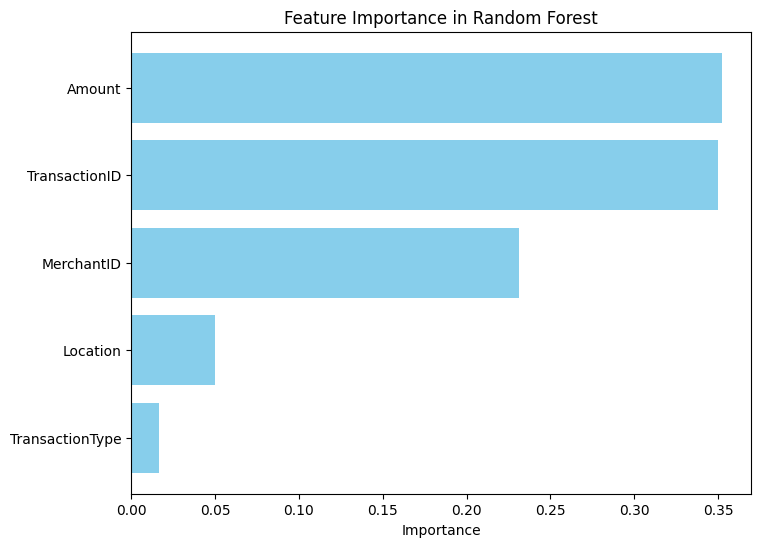

In [26]:
import matplotlib.pyplot as plt

importances = rf_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [27]:
feat_imp.head()

,Feature,Importance
1,Amount,0.352237
0,TransactionID,0.349701
2,MerchantID,0.231268
4,Location,0.050001
3,TransactionType,0.016793


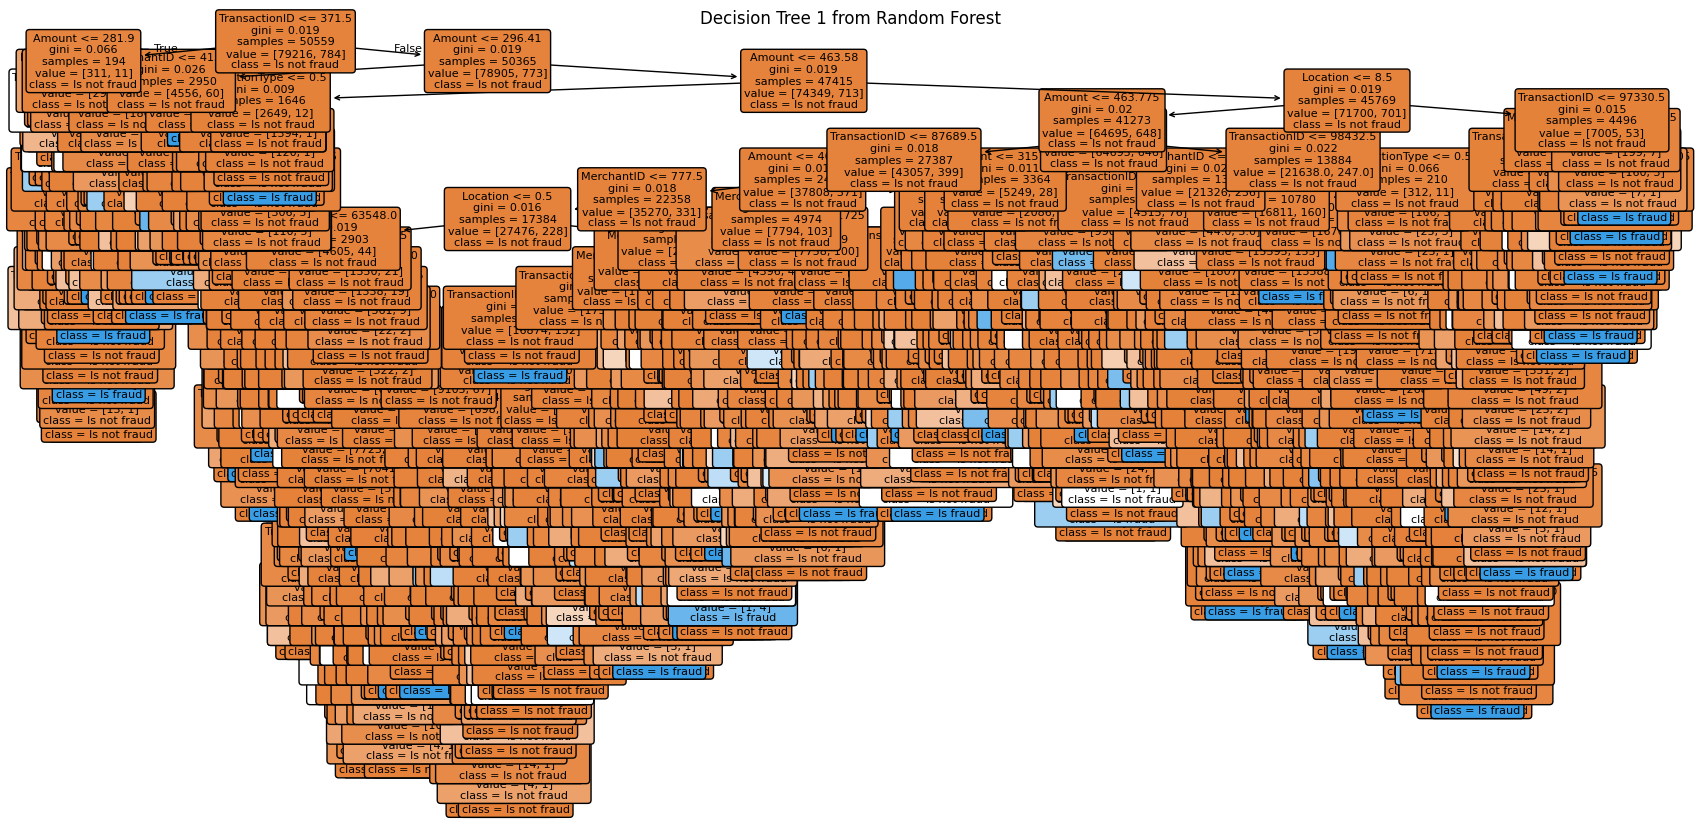

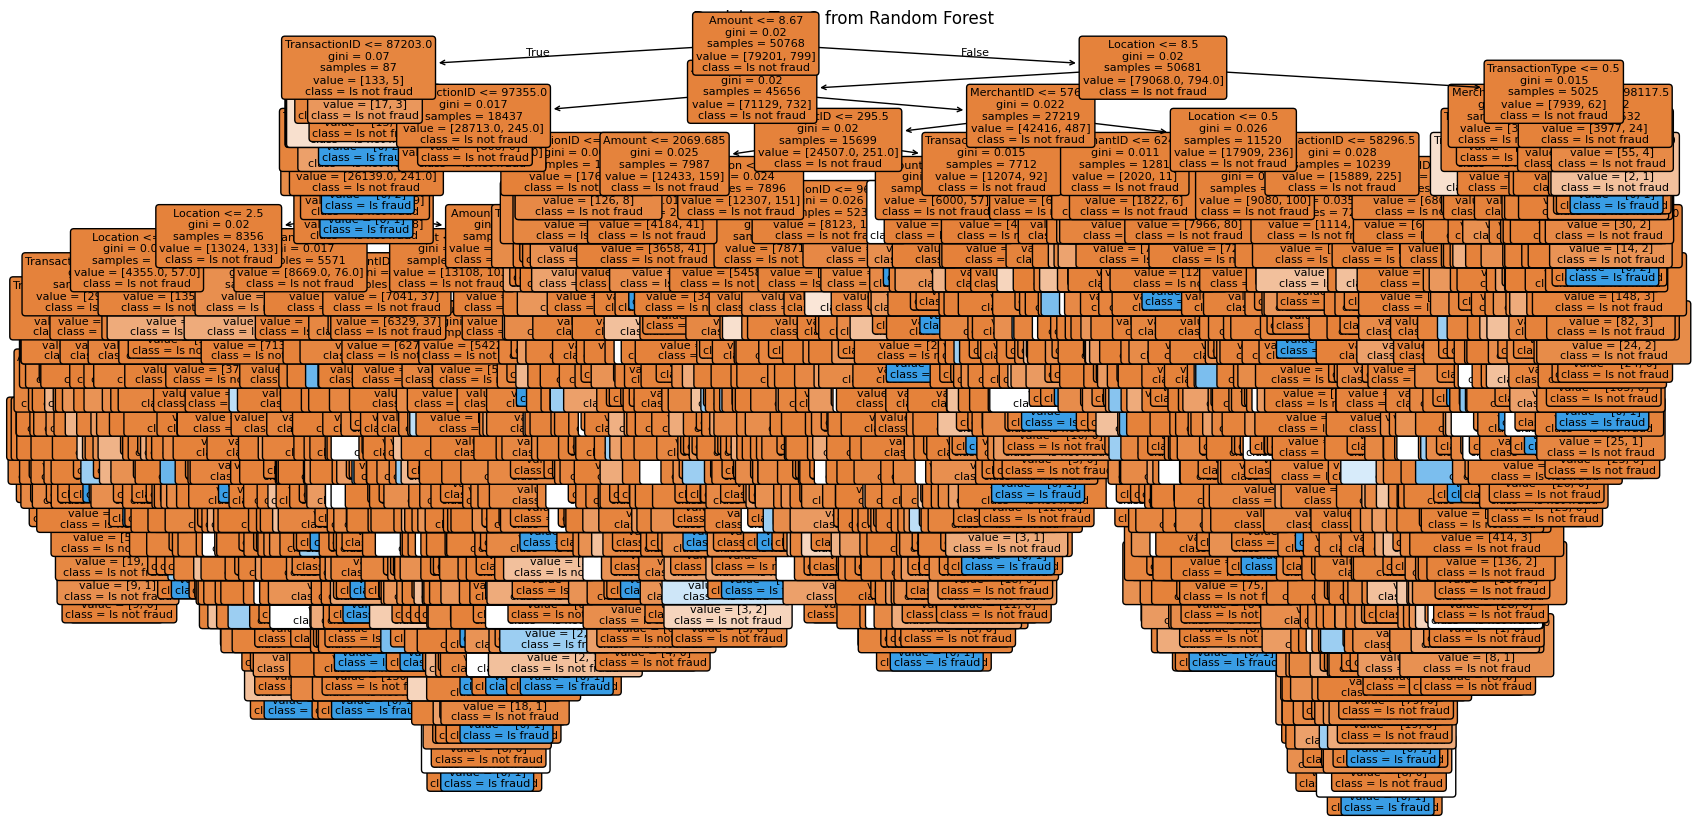

In [28]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[0], 
          feature_names=X.columns, 
          class_names=['Is not fraud', 'Is fraud'], 
          filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree 1 from Random Forest")
plt.show()

# Plot the second tree
plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[1], 
          feature_names=X.columns, 
          class_names=['Is not fraud', 'Is fraud'], 
          filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree 2 from Random Forest")
plt.show()

In [29]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

sample = X_test.iloc[0:1]
prediction = rf_classifier.predict(sample)

sample_dict = sample.iloc[0].to_dict()
print(f"\nSample prediction: {sample_dict}")
print(f"Predicted Is fraud: {'Is fraud' if prediction[0] == 1 else 'Is not fraud'}")

Accuracy: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     19787
           1       0.00      0.00      0.00       213

    accuracy                           0.99     20000
   macro avg       0.49      0.50      0.50     20000
weighted avg       0.98      0.99      0.98     20000


Sample prediction: {'TransactionID': 75722, 'Amount': 4031.22, 'MerchantID': 503, 'TransactionType': 1, 'Location': 6}
Predicted Is fraud: Is not fraud


In [30]:
sample.to_dict()

{'TransactionID': {75721: 75722},
 'Amount': {75721: 4031.22},
 'MerchantID': {75721: 503},
 'TransactionType': {75721: 1},
 'Location': {75721: 6}}

In [31]:
sample_dict_sam = sample.to_dict()
print(sample_dict_sam)

{'TransactionID': {75721: 75722}, 'Amount': {75721: 4031.22}, 'MerchantID': {75721: 503}, 'TransactionType': {75721: 1}, 'Location': {75721: 6}}


In [33]:
import pickle

with open("randomforestclassifier.pkl", "wb") as f:
    pickle.dump(rf_classifier, f)

print("randomforestclassifier.pkl file created successfully")


randomforestclassifier.pkl file created successfully
